# Time Series and Forecasting Models: Facebook Prophet

## 1. Introduction

Prophet is an open source library published by Facebook in 2017 which is built upon scikit-learn time series modelling and automatically detects changes in trends by selecting changepoints from the data. It is an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects, and includes automatic detection for all values. 



## 2. Install/import libraries

In [ ]:
!pip install fbprophet
!pip install mplfinance

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd /content/drive/My Drive/

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

from fbprophet import Prophet

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 3. Import data

In [66]:
rel = pd.read_csv("rel.csv")

rel.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,540.427307,540.427307,506.127411,532.700500,484.266083,35372156.0
1,2010-01-05,569.551208,569.551208,527.697937,530.323059,482.104797,9872785.0
2,2010-01-06,534.879883,542.111328,530.298279,538.891846,489.894501,10933743.0
3,2010-01-07,538.891846,552.265076,533.938782,547.832092,498.021820,12090336.0
4,2010-01-08,548.797974,551.670715,542.854309,546.395691,496.716095,6973331.0


In [67]:
df_new = rel.iloc[:, [0,5]]
df_new.to_csv("rel1.csv", index = False)
df_new.head

<bound method NDFrame.head of             Date    Adj Close
0     2010-01-04   484.266083
1     2010-01-05   482.104797
2     2010-01-06   489.894501
3     2010-01-07   498.021820
4     2010-01-08   496.716095
...          ...          ...
2463  2019-12-23  1545.848511
2464  2019-12-24  1521.304321
2465  2019-12-26  1490.759155
2466  2019-12-27  1517.270874
2467  2019-12-30  1519.090820

[2468 rows x 2 columns]>

In [68]:
df = pd.read_csv("rel1.csv")
df.head

<bound method NDFrame.head of             Date    Adj Close
0     2010-01-04   484.266083
1     2010-01-05   482.104797
2     2010-01-06   489.894501
3     2010-01-07   498.021820
4     2010-01-08   496.716095
...          ...          ...
2463  2019-12-23  1545.848511
2464  2019-12-24  1521.304321
2465  2019-12-26  1490.759155
2466  2019-12-27  1517.270874
2467  2019-12-30  1519.090820

[2468 rows x 2 columns]>

## 4. Format data for Prophet

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [69]:
# Create a dataframe that complies with Prophet requirements
prophet_rel_adj = pd.read_csv("rel1.csv")

prophet_rel_adj.head()

,Date,Adj Close
0,2010-01-04,484.266083
1,2010-01-05,482.104797
2,2010-01-06,489.894501
3,2010-01-07,498.021820
4,2010-01-08,496.716095


In [70]:
# Reset the index back so Dates are no longer indexed
# prophet_rel_adj.reset_index(inplace=True)

# Rename the columns for use in FB prophet
prophet_rel_adj.rename(columns={'Date': 'ds', 'Adj Close': 'y'}, inplace=True)

prophet_rel_adj.tail()

,ds,y
2463,2019-12-23,1545.848511
2464,2019-12-24,1521.304321
2465,2019-12-26,1490.759155
2466,2019-12-27,1517.270874
2467,2019-12-30,1519.090820


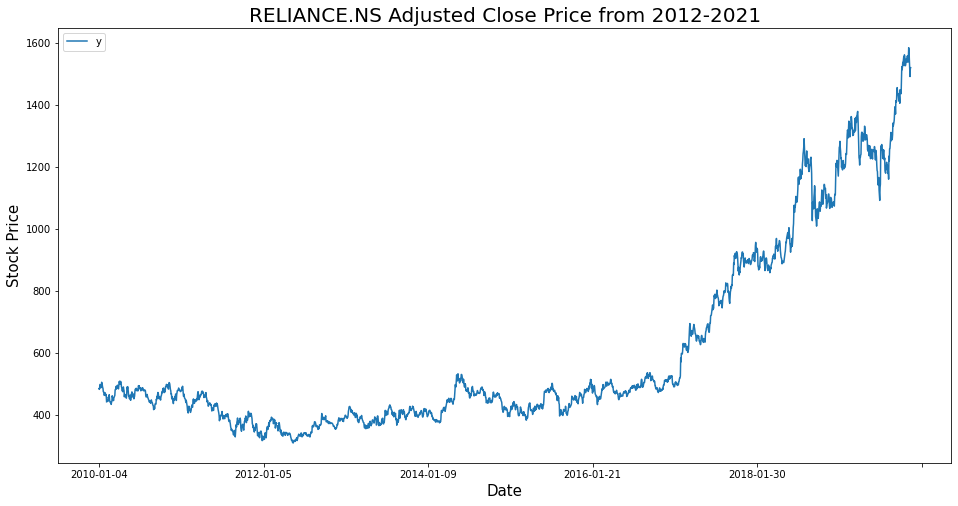

In [71]:
# Plot Adjusted Close price
pd.plotting.register_matplotlib_converters()
ax = prophet_rel_adj.set_index('ds').plot(figsize=(16,8))
ax.set_title('RELIANCE.NS Adjusted Close Price from 2012-2021', color = 'black', fontsize = 20)
ax.set_ylabel('Stock Price', color = 'black', fontsize = 15)
ax.set_xlabel('Date', color = 'black', fontsize = 15)

plt.show()

## 5. Modelling

Prophet follows the sklearn model API. We create an instance of the Prophet class and then call its fit and predict methods.

### 5.1 Fit and train the model

Fit the model by instantiating a new Prophet object. Any settings to the forecasting procedure are passed into the constructor.

In [72]:
# Instantiate model and pass seasonality setting

m = Prophet(daily_seasonality = True)

Call the fit method and pass in the dataframe of dates and prices.



In [73]:
# fit the model

m.fit(prophet_rel_adj)

### 5.2 Create future dates to forecast

Predictions are then made on a dataframe with a column ds containing the dates for which a prediction is to be made. You can get a suitable dataframe that extends into the future a specified number of days using the helper method Prophet.make_future_dataframe.

In [74]:
# create a dataframe containing future dates to be forecast 
future = m.make_future_dataframe(periods=730, freq='D')     
future.tail()

,ds
3193,2021-12-25
3194,2021-12-26
3195,2021-12-27
3196,2021-12-28
3197,2021-12-29


### 5.3 Predictions

Forecasting future values in the dataframe containing dates for prediction.

In [75]:
# Pass the dataframe to the model with dates to predict future values
forecast = m.predict(future)

### Plot Actual vs Predicted prices

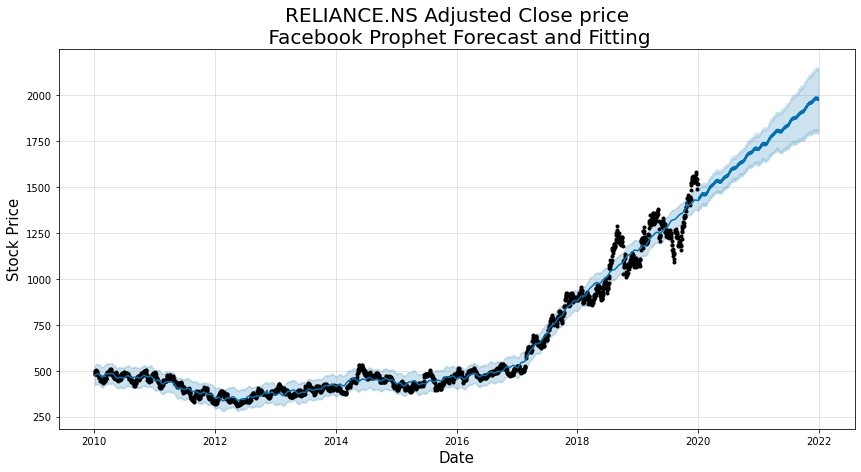

In [76]:
# Plot Forecast and Actual prices  
m.plot(forecast, uncertainty=True, figsize=(12,6))
plt.title('RELIANCE.NS Adjusted Close price\n Facebook Prophet Forecast and Fitting', color = 'black', fontsize = 20)
plt.xlabel("Date", color = 'black', fontsize = 15)
plt.ylabel("Stock Price", color = 'black', fontsize = 15)
plt.show()

In the above plot:
*   Blue line = Forecasted values
*   Black dots = Observed (actual) values
*   Blue-shaded region = Confidence interval


### Trend Changepoints

Time series frequently have abrupt changes in their trajectories. By default, Prophet will automatically detect these changepoints and will allow the trend to adapt appropriately.

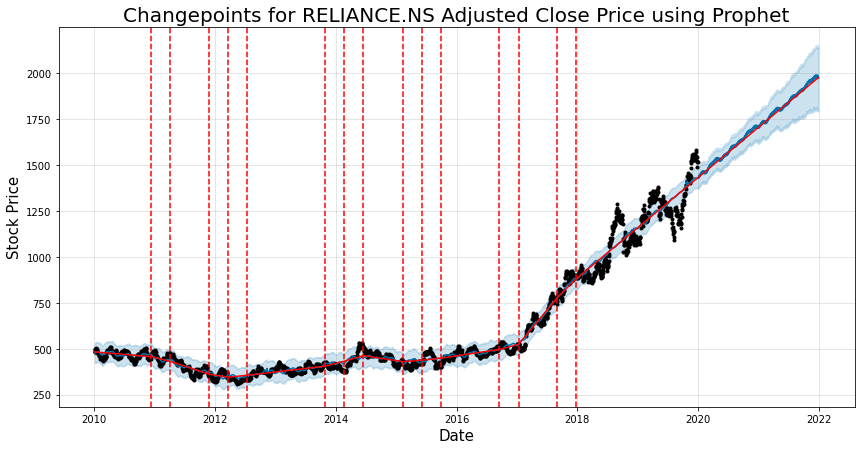

In [77]:
from fbprophet.plot import add_changepoints_to_plot

fig = m.plot(forecast, figsize=(12,6))
# the change points are added to our plot 
a = add_changepoints_to_plot(fig.gca(), m, forecast)
plt.title("Changepoints for RELIANCE.NS Adjusted Close Price using Prophet", color = 'black', fontsize = 20)
plt.xlabel("Date", color = 'black', fontsize = 15)
plt.ylabel("Stock Price", color = 'black', fontsize = 15)
plt.show()

By default, Prophet adds 25 changepoints into the initial 80% of the data set. Taking a look at the possible changepoints (dotted red lines) in the above chart, we can see they fit quite well with some of the highs and lows.

### Plot magnitudes of changepoints

Prophet will also let us take a look at the magnitudes of these possible changepoints.

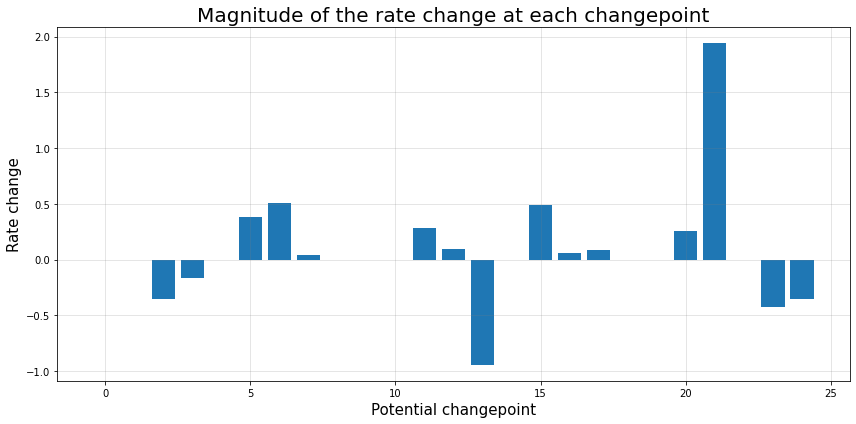

In [78]:
deltas = m.params['delta'].mean(0) 
fig = plt.figure(facecolor='w', figsize=(12,6))
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas)
ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
plt.title('Magnitude of the rate change at each changepoint', color = 'black', fontsize = 20)
ax.set_ylabel('Rate change', color = 'black', fontsize = 15)
ax.set_xlabel('Potential changepoint', color = 'black', fontsize = 15)
fig.tight_layout()

We can see that the red dotted lines in the plot of changepoints correspond with plot above of the magnitude of the rate change at each changepoint. Even though we have a lot of places where the rate can possibly change, because of the sparse prior, most of these changepoints go unused.

### Extract changepoints

If we want to use something like this in a model, we need a way of extracting changepoint data.

In [79]:
# View changepoints

m.changepoints

79     2010-05-03
157    2010-08-19
236    2010-12-13
315    2011-04-06
393    2011-07-28
472    2011-11-28
551    2012-03-22
629    2012-07-13
708    2012-11-09
787    2013-03-06
865    2013-07-01
944    2013-10-25
1023   2014-02-18
1102   2014-06-17
1180   2014-10-13
1259   2015-02-09
1338   2015-06-08
1416   2015-09-28
1495   2016-01-25
1574   2016-05-24
1652   2016-09-15
1731   2017-01-10
1810   2017-05-09
1888   2017-08-30
1967   2017-12-21
Name: ds, dtype: datetime64[ns]

### Plot components of the forecasts

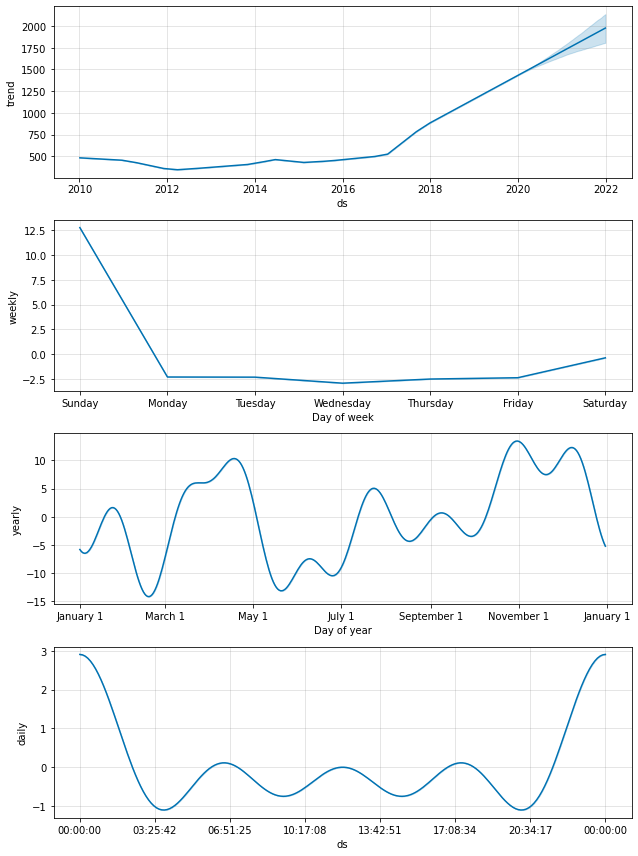

In [80]:
# Plot the trend, weekly, yearly and daily components

m.plot_components(forecast)
plt.show()

Our data has some seasonal information present. Based on the estimated trends, we can see from the yearly subplot that, usually, the stock price is highest in mid-November and, according to the weekly subplot, mostly on Fridays.(Given: Saturday and Sunday being market holidays) Inevitably, the daily subplot shows that the stock price fluctuates throughout the day.

Finally, the trend subplot shows an upward trend including an increase in the stock price between mid 2020 and beginning of 2022). The dataset only contained data up to the end of 2019 so this prediction does not reflect any impact of Covid-19.